<a href="https://colab.research.google.com/github/Vaishnavi-Hegde17/Deep_Learning-and-Gen_AI-Lab/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Dataset: https://www.kaggle.com/datasets/hojjatk/mnist-dataset

CIFAR10 and CIFAR100 Datasets(University of Toronto): https://www.cs.toronto.edu/~kriz/cifar.html

CIFAR10 Dataset (Kaggle): https://www.kaggle.com/c/cifar-10/

Fashion MNIST Dataset(Kaggle): https://www.kaggle.com/datasets/zalando-research/fashionmnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


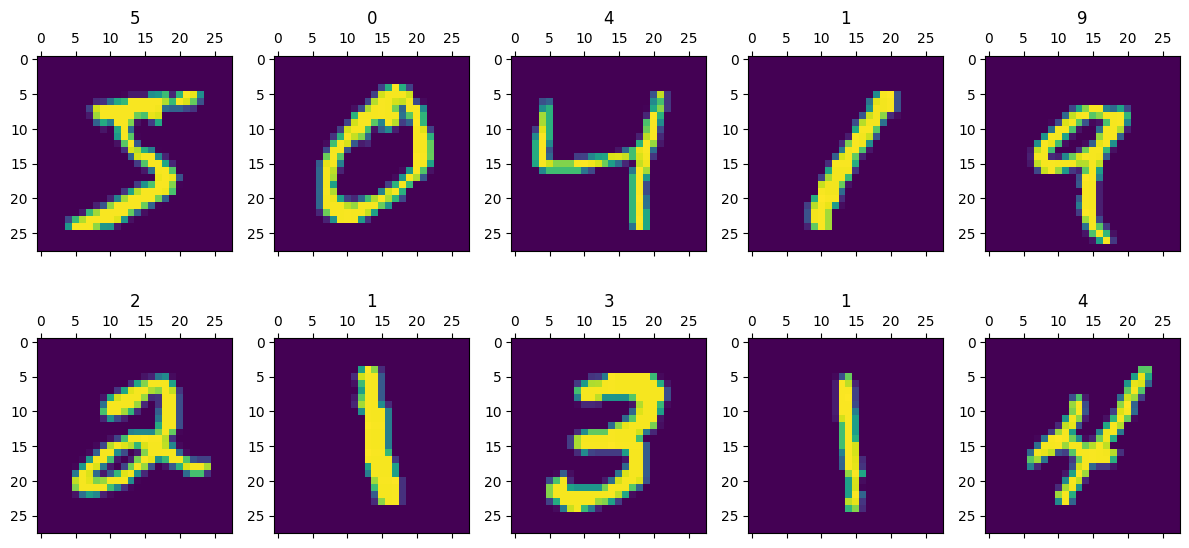

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
Epoch 1/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - Accuracy: 0.8741 - loss: 0.4222
Epoch 2/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Accuracy: 0.9652 - loss: 0.1152
Epoch 3/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - Accuracy: 0.9766 - loss: 0.0755
Epoch 4/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - Accuracy: 0.9805 - loss: 0.0606
Epoch 5/5
4800/4800 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - Accuracy: 0.9840 - loss: 0.0496 - val_Accuracy: 0.9722 - val_loss: 0.0985
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Model Summary


Model: "DFF-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,440 (1.27 MB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 222,294 (868.34 KB)


---------- Evaluation on Training Data -----------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.97      0.99      0.98      5958
           3       0.98      0.98      0.98      6131
           4       0.99      0.98      0.99      5842
           5       0.99      0.98      0.98      5421
           6       0.99      0.99      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.98      0.98      0.98      5851
           9       0.99      0.98      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000


---------- Evaluation on Test Data -----------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.9

In [ ]:
# Load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load digits data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Display images of the first 10 digits in the training set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].matshow(X_train[n])
        axs[i, j].set(title=str(y_train[n]))
        n += 1
plt.show()

# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255

# Print new shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

# Design the Deep Feedforward Neural Network (DFFN) architecture
model = Sequential(name="DFF-Model")
model.add(Input(shape=(784,), name='Input-Layer'))
model.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile the Keras model
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['Accuracy'])

# Fit the model on the training dataset
model.fit(X_train, y_train,
          batch_size=10,
          epochs=5,
          verbose='auto',
          validation_split=0.2,
          shuffle=True,
          validation_freq=5)

# Predict class labels on training and test data
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train), axis=1))
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# Model Summary
print("\nModel Summary")
model.summary()

# Model Performance
print("\n---------- Evaluation on Training Data -----------")
print(classification_report(y_train, pred_labels_tr))

print("\n---------- Evaluation on Test Data -----------")
print(classification_report(y_test, pred_labels_te))


To-Do:
Use the MNIST datasets.

Use the CIFAR10 datasets.

*Record the accuracy corresponding to the number of epochs 5, 50, 100.

*Repeat for CIFAR10 datasets. Note down the changes made and the accuracies obtained.

*Use the Fashion MNIST Dataset

*Perform and Plot the Comparative Analysis.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Shape of X_train_cifar:  (50000, 32, 32, 3)
Shape of y_train_cifar:  (50000, 1)
Shape of X_test_cifar:  (10000, 32, 32, 3)
Shape of y_test_cifar:  (10000, 1)


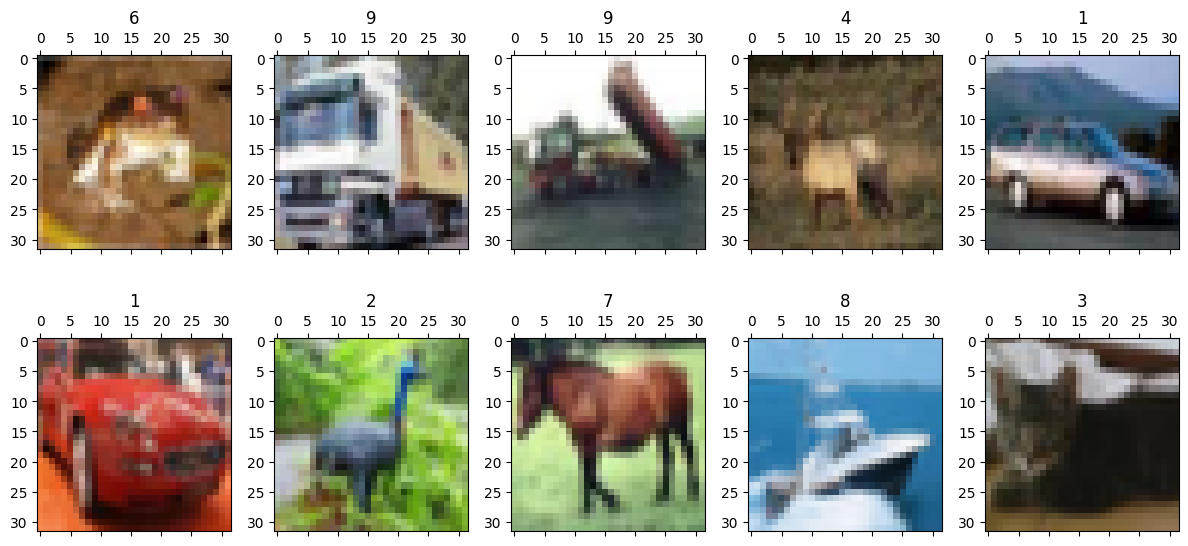

New shape of X_train_cifar:  (50000, 3072)
New shape of X_test_cifar:  (10000, 3072)
Epoch 1/5
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - Accuracy: 0.2517 - loss: 2.0372
Epoch 2/5
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - Accuracy: 0.3429 - loss: 1.8037
Epoch 3/5
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - Accuracy: 0.3689 - loss: 1.7443
Epoch 4/5
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - Accuracy: 0.3863 - loss: 1.6934
Epoch 5/5
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - Accuracy: 0.3929 - loss: 1.6780 - val_Accuracy: 0.3947 - val_loss: 1.6795
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model Summary (CIFAR10)


Model: "DFF-Model-CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,212,032 (4.62 MB)

 Trainable params: 404,010 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 808,022 (3.08 MB)


---------- Evaluation on Training Data (CIFAR10) -----------
              precision    recall  f1-score   support

           0       0.53      0.40      0.45      5000
           1       0.48      0.60      0.53      5000
           2       0.27      0.10      0.15      5000
           3       0.25      0.20      0.22      5000
           4       0.31      0.37      0.33      5000
           5       0.30      0.44      0.36      5000
           6       0.42      0.43      0.42      5000
           7       0.42      0.49      0.46      5000
           8       0.52      0.62      0.57      5000
           9       0.53      0.39      0.45      5000

    accuracy                           0.40     50000
   macro avg       0.40      0.40      0.39     50000
weighted avg       0.40      0.40      0.39     50000


---------- Evaluation on Test Data (CIFAR10) -----------
              precision    recall  f1-score   support

           0       0.54      0.41      0.47      1000
           1

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
# Load CIFAR10 data
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

# Print shapes
print("Shape of X_train_cifar: ", X_train_cifar.shape)
print("Shape of y_train_cifar: ", y_train_cifar.shape)
print("Shape of X_test_cifar: ", X_test_cifar.shape)
print("Shape of y_test_cifar: ", y_test_cifar.shape)

# Display images of the first 10 digits in the training set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12, 6), facecolor='white')
n = 0
for i in range(2):
    for j in range(5):
        axs[i, j].matshow(X_train_cifar[n])
        # Flatten the label array to get a single integer
        axs[i, j].set(title=str(y_train_cifar[n][0]))
        n += 1
plt.show()

# Reshape and normalize (divide by 255) input data
X_train_cifar = X_train_cifar.reshape(50000, 32 * 32 * 3).astype("float32") / 255
X_test_cifar = X_test_cifar.reshape(10000, 32 * 32 * 3).astype("float32") / 255

# Print new shapes
print("New shape of X_train_cifar: ", X_train_cifar.shape)
print("New shape of X_test_cifar: ", X_test_cifar.shape)

# Design the Deep Feedforward Neural Network (DFFN) architecture for CIFAR10
model_cifar = Sequential(name="DFF-Model-CIFAR10")
model_cifar.add(Input(shape=(32 * 32 * 3,), name='Input-Layer'))
model_cifar.add(Dense(128, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal'))
model_cifar.add(Dense(64, activation='relu', name='Hidden-Layer-2', kernel_initializer='HeNormal'))
model_cifar.add(Dense(32, activation='relu', name='Hidden-Layer-3', kernel_initializer='HeNormal'))
model_cifar.add(Dense(10, activation='softmax', name='Output-Layer'))

# Compile the Keras model for CIFAR10
model_cifar.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['Accuracy'])

# Fit the model on the training dataset for CIFAR10
model_cifar.fit(X_train_cifar, y_train_cifar,
          batch_size=10,
          epochs=5,  # You can change epochs to 50, 100
          verbose='auto',
          validation_split=0.2,
          shuffle=True,
          validation_freq=5)

# Predict class labels on training and test data for CIFAR10
pred_labels_tr_cifar = np.array(tf.math.argmax(model_cifar.predict(X_train_cifar), axis=1))
pred_labels_te_cifar = np.array(tf.math.argmax(model_cifar.predict(X_test_cifar), axis=1))

# Model Summary for CIFAR10
print("\nModel Summary (CIFAR10)")
model_cifar.summary()

# Model Performance for CIFAR10
print("\n---------- Evaluation on Training Data (CIFAR10) -----------")
print(classification_report(y_train_cifar, pred_labels_tr_cifar))

print("\n---------- Evaluation on Test Data (CIFAR10) -----------")
print(classification_report(y_test_cifar, pred_labels_te_cifar))